<a href="https://colab.research.google.com/github/dmareee/EDA_Sales_Supermarket/blob/main/Read_%26_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read Data and Data Cleaning

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
url = "/content/supermarket_sales.csv"
sauce = pd.read_csv(url)
sauce

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7
...,...,...,...,...,...,...,...,...,...,...
995,1/29/2019,Ewallet,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1
996,3/2/2019,Ewallet,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10
997,2/9/2019,Cash,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1
998,2/22/2019,Cash,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1


In [75]:
sauce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [76]:
sauce.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [77]:
# Change Dtype
sauce_cleaned = sauce.copy()

sauce_cleaned['Date'] = pd.to_datetime(sauce_cleaned['Date'])
sauce_cleaned["Revenue"] = sauce_cleaned['Unit price'] * sauce_cleaned['Quantity']
sauce_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB


In [78]:
sauce_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [79]:
for col_name in ['Payment', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line']:
    print(sauce_cleaned[col_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [80]:
dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'}
sauce_replaced = sauce_cleaned.replace(dict_typo)
sauce_replaced.head(10)

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17
5,2019-03-25,Ewallet,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,597.73
6,2019-02-25,Ewallet,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,413.04
7,2019-02-24,Ewallet,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,735.60
8,2019-01-10,Credit card,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,72.52
9,2019-02-20,Credit card,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,164.52


In [81]:
sauce_replaced['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [82]:
sauce_replaced['Invoice ID'].duplicated().sum()

0

## EDA

#### Daily Trend Ovrall

##### BY Daily

In [83]:
agg_daily = sauce_replaced.groupby('Date', as_index=False,)['Revenue','Quantity'].sum()
agg_daily

,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55
...,...,...,...
84,2019-03-26,1869.06,52
85,2019-03-27,2764.59,45
86,2019-03-28,2123.24,48
87,2019-03-29,3831.66,54


Text(0.5, 1.0, 'Revenue Trend')

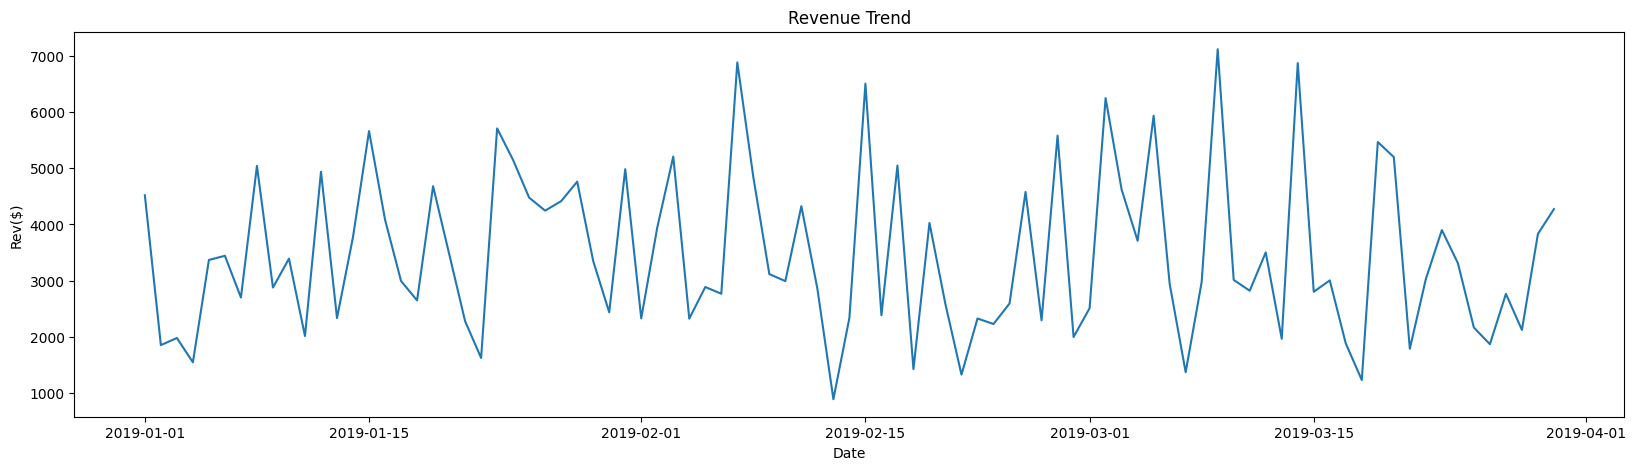

In [84]:
plt.rcParams['figure.figsize'] = (20,5)

plt.plot("Date", "Revenue", data=agg_daily)
plt.xlabel("Date")
plt.ylabel("Rev($)")
plt.title("Revenue Trend")

<Axes: xlabel='Date', ylabel='Quantity'>

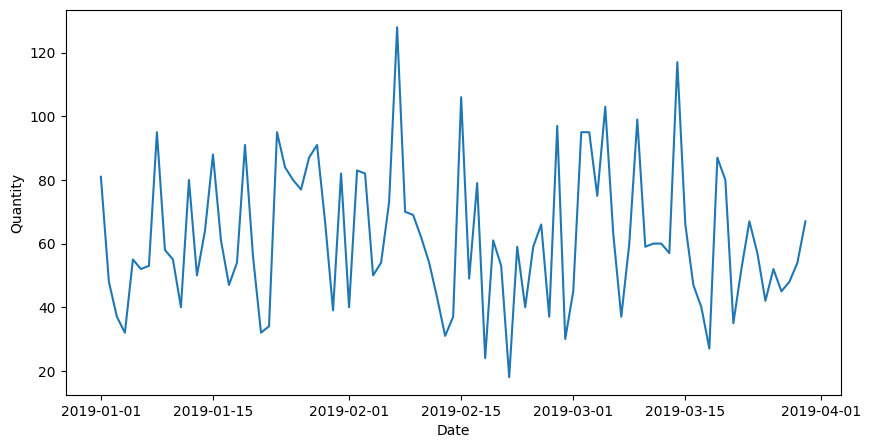

In [93]:
sns.lineplot(data = agg_daily, x='Date', y='Quantity')

##### BY Payment

In [86]:
agg_payment = sauce_replaced.groupby('Payment', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' : 'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


Highest revenue yang didapatkan berasal dari Cash


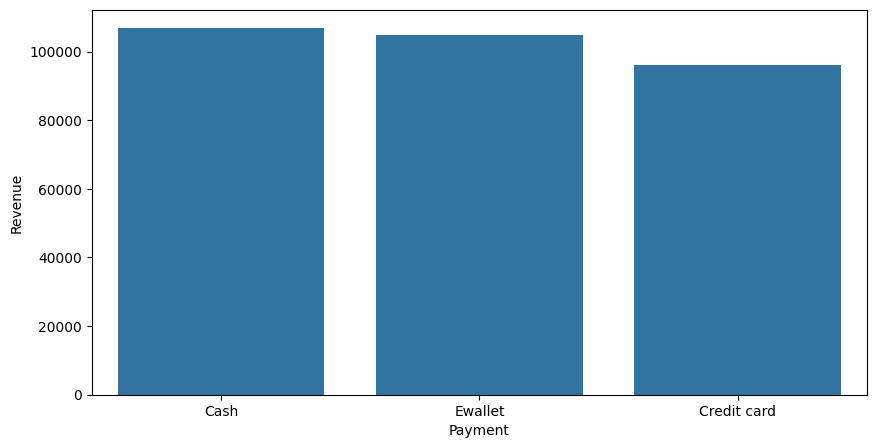

In [104]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(x='Payment', y='Revenue', data=agg_payment.sort_values('Revenue', ascending=False))
print("Highest revenue yang didapatkan berasal dari Cash")

Count dari kebanyakan pengguna menggunakan methode ewallet


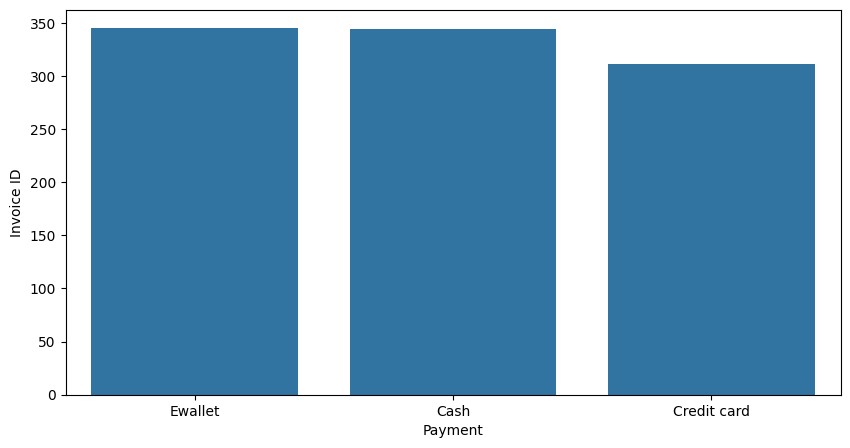

In [105]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(x='Payment', y='Invoice ID', data=agg_payment.sort_values('Invoice ID', ascending=False))
print("Count dari kebanyakan pengguna menggunakan methode ewallet")

([<matplotlib.patches.Wedge at 0x7b8ec0a75fc0>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.288108634542965, -0.5263016385133037, '34.1%')])

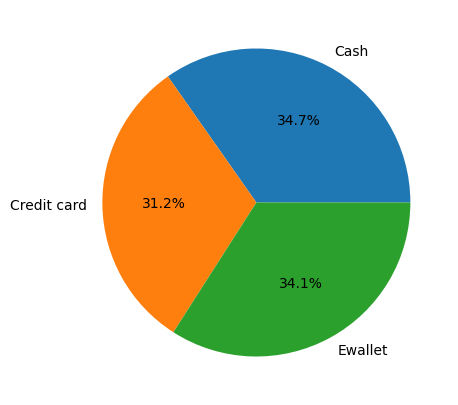

In [107]:
plt.pie(agg_payment['Revenue'], labels = agg_payment['Payment'],autopct='%.1f%%')

##### BY Gender & BY Product Type

In [113]:
agg_gender = sauce_replaced.groupby(['Gender', 'Product line'], as_index=False)['Invoice ID'].nunique()
agg_gender.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


Tidak Terduga health beauty product didom oleh male/laki - laki


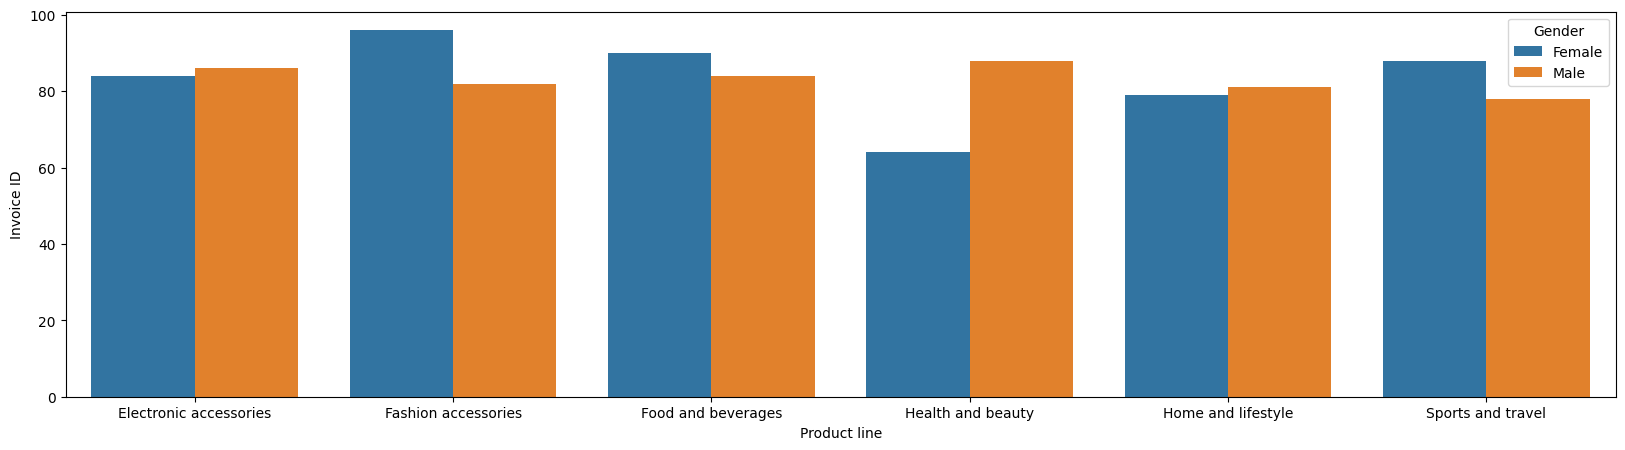

In [116]:
plt.rcParams['figure.figsize'] = (20,5)
sns.barplot(x='Product line', y='Invoice ID', data=agg_gender, hue = 'Gender')
print("Tidak Terduga health beauty product didom oleh male/laki - laki")